### How does a playlist’s genre diversity affect its popularity?

In [37]:
import os
import json
import pickle
from collections import defaultdict
from collections import Counter
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [38]:
with open('mappings/Q1/playlist_dataL1.pkl', 'rb') as fp:
    playlist_data = pickle.load(fp)

In [39]:
list(playlist_data.items())[:5]

[(962001, (1.9835831548893639, 1)),
 (962003, (1.9718058529621698, 1)),
 (962005, (1.9807280513918628, 1)),
 (962006, (1.9600285510349749, 1)),
 (962011, (1.997501784439686, 1))]

In [40]:
div = np.asarray([x[1] for x in playlist_data.items()])

In [41]:
div.shape

(409039, 2)

In [42]:
np.max(div[:,0])

1.9996431120628144

### Explore Diversity Metric

Text(0.5, 1.0, '# Playlists in Each Diversity Score')

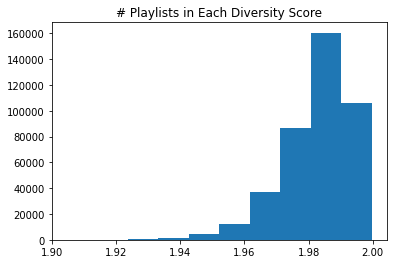

In [43]:
plt.hist(div[:,0])
plt.title('# Playlists in Each Diversity Score')

### Regression on f>1

In [44]:
mask = [x[1] > 1 for x in div]
data = div[mask]

Text(0.5, 1.0, '# Playlists (f>1) in Each Diversity Score')

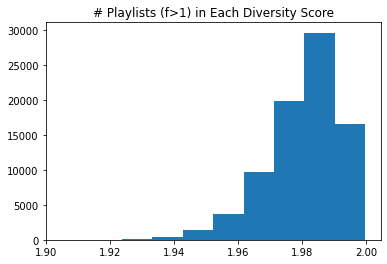

In [45]:
plt.hist(data[:,0])
plt.title('# Playlists (f>1) in Each Diversity Score')

Text(0.5, 1.0, 'Followers vs Diversity')

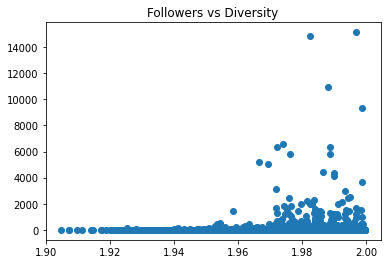

In [47]:
plt.scatter(data[:,0], data[:,1])
plt.title('Followers vs Diversity')

In [48]:
np.max(data[:,1])

15123.0

In [49]:
frs = data[:,1]

In [50]:
np.quantile(frs, 0.999)

538.6000000000495

In [51]:
mask2 = [x[1] < 5712 for x in data]
data_adj = data[mask2]

In [52]:
len(data_adj)

81192

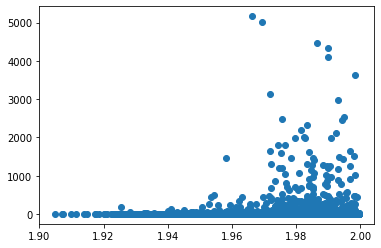

In [53]:
plt.scatter(data_adj[:,0], data_adj[:,1])

(array([6.0000e+00, 1.4000e+01, 1.0300e+02, 3.8800e+02, 1.3640e+03,
        3.6650e+03, 9.7090e+03, 1.9833e+04, 2.9618e+04, 1.6492e+04]),
 array([1.90471092, 1.91420414, 1.92369736, 1.93319058, 1.9426838 ,
        1.95217702, 1.96167024, 1.97116345, 1.98065667, 1.99014989,
        1.99964311]),
 <BarContainer object of 10 artists>)

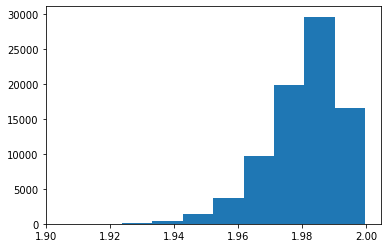

In [54]:
plt.hist(data_adj[:,0])

In [55]:
np.min(data_adj[:,1])

2.0

In [56]:
def msk(a,b, ix=1):
    m = [a <= x[ix] and x[ix] <= b for x in div]
    print(len(div[m]))
    data = div[m]
    return data

In [57]:
d = msk(10,50)

1553


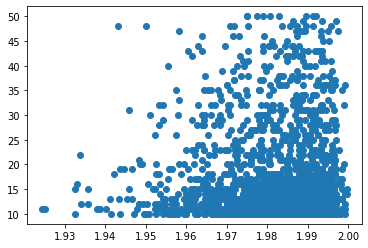

In [58]:
plt.scatter(d[:,0], d[:,1])

In [59]:
def selector(a=np.min(div[:,1]),b=np.max(div[:,1]),c=np.min(div[:,0]),d=np.max(div[:,0])):
    m = [a <= x[1] and x[1] < b and c <= x[0] and x[0] < d for x in div]
    print(len(div[m]))
    data = div[m]
    return data

614


(0.051431562118780895, 0.20313540935065796)

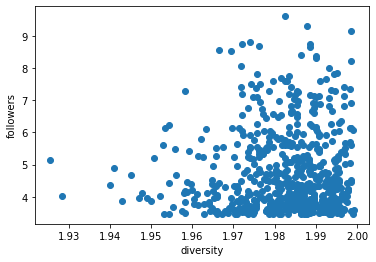

In [60]:
d = selector(a=32)
plt.scatter(d[:,0], np.log(d[:,1]))
plt.ylabel('followers')
plt.xlabel('diversity')
stats.pearsonr(d[:,0], np.log(d[:,1]))

### Playling with Regression

In [61]:
d = selector(a=40)
x = d[:,0]
y,_ = stats.boxcox(d[:,1])
res = stats.linregress(x,y)

512


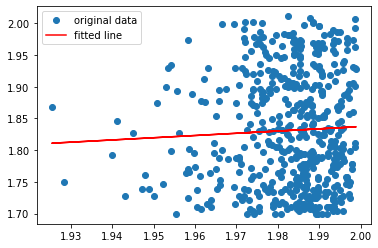

In [62]:
plt.plot(x, y, 'o', label='original data')
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
plt.legend()
plt.show()

In [63]:
print(f"R-squared: {res.rvalue**2:.6f}")

R-squared: 0.002093


### Regression and ANOVA on subsections

In [67]:
start = 1.90
w = 0.005
end = start + w
fcutoffa = 2
while end <= 2:
    d = selector(a=fcutoffa, c=start, d=end)
    x = d[:,0]
    y = d[:,1]
    res = stats.linregress(x,y)
    print("R-squared: {} on {}-{}".format(res.rvalue**2, start, end))
    start = end
    end += w

1
R-squared: 0.0 on 1.9-1.9049999999999998


/home/milen/GitHub/proj/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
/home/milen/GitHub/proj/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:184: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/home/milen/GitHub/proj/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:187: RuntimeWarning: invalid value encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


3
R-squared: 0.0 on 1.9049999999999998-1.9099999999999997
3
R-squared: 0.6331789182314413 on 1.9099999999999997-1.9149999999999996
3
R-squared: 0.9400650638490119 on 1.9149999999999996-1.9199999999999995
18
R-squared: 0.00037637500597980674 on 1.9199999999999995-1.9249999999999994
43
R-squared: 0.04327305271169003 on 1.9249999999999994-1.9299999999999993
84
R-squared: 0.004756799864552522 on 1.9299999999999993-1.9349999999999992
192
R-squared: 0.0005755115359227791 on 1.9349999999999992-1.939999999999999
348
R-squared: 0.01050989049545793 on 1.939999999999999-1.944999999999999
693
R-squared: 0.0014917055415689438 on 1.944999999999999-1.9499999999999988
1159
R-squared: 0.0008748012172246545 on 1.9499999999999988-1.9549999999999987
1995
R-squared: 0.00010631325693078726 on 1.9549999999999987-1.9599999999999986
3312
R-squared: 3.92523884725576e-05 on 1.9599999999999986-1.9649999999999985
5317
R-squared: 1.4887352605711573e-05 on 1.9649999999999985-1.9699999999999984
8276
R-squared: 6.0271

In [34]:
# fvalue, pvalue = stats.f_oneway(df['A'], df['B'], df['C'], df['D'])
w = 0.3 # for .3 works, for .2 not???
bins = np.arange(0,1+w,w)
groups = [selector(a=2, c=s, d=s+w)[:,1] for s in bins[:-1]]

0
0
0
0


In [35]:
stats.alexandergovern(*groups)

ValueError: Input sample size must be greater than one.

In [36]:
stats.levene(*groups)

/home/milen/GitHub/proj/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/milen/GitHub/proj/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


LeveneResult(statistic=nan, pvalue=nan)

In [29]:
for g in groups:
    print(np.std(g))

NameError: name 'groups' is not defined

In [30]:
d = selector(a=2)

81199


(array([  325.,  2327.,  5812., 10299., 13460., 15717., 13651., 10816.,
         6929.,  1863.]),
 array([1.69854713e+16, 5.43544497e+16, 9.17234281e+16, 1.29092407e+17,
        1.66461385e+17, 2.03830363e+17, 2.41199342e+17, 2.78568320e+17,
        3.15937298e+17, 3.53306277e+17, 3.90675255e+17]),
 <BarContainer object of 10 artists>)

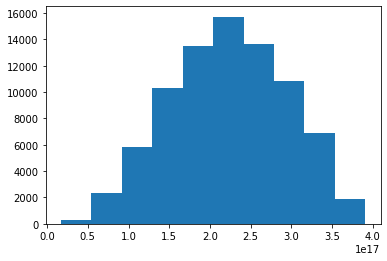

In [31]:
plt.hist(stats.boxcox(d[:,0])[0])

(array([53809.,     0.,     0.,     0.,     0.,     0., 14437.,     0.,
         5387.,  7566.]),
 array([0.31910654, 0.32527427, 0.33144199, 0.33760971, 0.34377743,
        0.34994515, 0.35611287, 0.36228059, 0.36844832, 0.37461604,
        0.38078376]),
 <BarContainer object of 10 artists>)

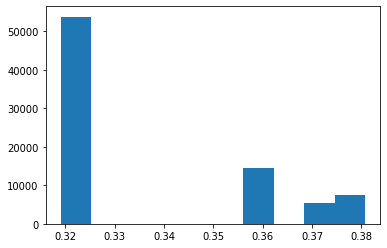

In [32]:
plt.hist(stats.boxcox(d[:,1])[0])

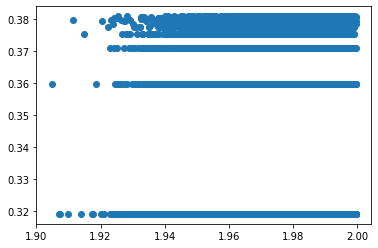

In [33]:
plt.scatter(d[:,0],stats.boxcox(d[:,1])[0])